# RESHAPING DATA 

Çıktılarımızı birbirinden ayırmamızı sağlayacak bir işlev yazalım.

In [1]:
def ayrac():
    print("\n*****\n")

## Stacking and Unstacking Data Frames 

+ Stacking Dataframes (Veri çerçevelerini yığınlama)
+ Unstacking Dataframes (Veri çerçevelerini istiflemeden çıkarma)
+ Handling Missing Data (Eksik verileri işleme)

### < Stacking DataFrames > 

Bu başlık altında, multi-index'e (yani birden çok satır olmuş sütuna) sahip dataframe oluşturmayı ve bunlarla çalışmayı göreceğiz. 

Aşağıdaki kod bloğunda, churn_1 adlı veri setinde **pd.set_index()** işlevi ile satırlarda multi-index oluşturalım.

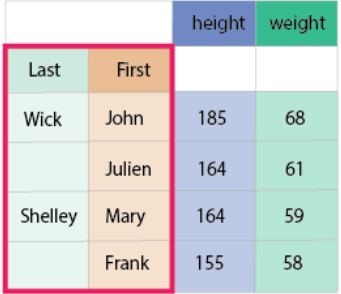

+ pandas.DataFrame.set_index = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [2]:
import pandas as pd
churn_1 = pd.read_csv("churn_1.csv")
print(churn_1)
ayrac()

#1
multi_churn_1 = churn_1.set_index(["country", "age"])
print(multi_churn_1)
ayrac()

   credit_score  age  country  num_products exited
0           619   43   France             1    Yes
1           608   34  Germany             0     No
2           502   23   France             1    Yes

*****

             credit_score  num_products exited
country age                                   
France  43            619             1    Yes
Germany 34            608             0     No
France  23            502             1    Yes

*****



+ 1-) **multi_churn_1**, churn_1'in **country ve age** sütunlarının satır indeksi olarak ayarlanmış hali oldu. İkisini karşılaştırdığımızda dikkat edersek, ilk çıktıda satır indexleri 0,1,2 iken, ikinci çıktıda country ve age sütunlarındaki değerler oldu.

Aşağıdaki kod bloğunda, yeni sütunlar oluşturup o sütunların satır indeksi olmasını **pd.MultiIndex.from_arrays()** işlevi ile sağlayalım.

+ pandas.MultiIndex.from_arrays() = https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_arrays.html

In [3]:
#1
new_array = [["yes", "no", "yes"] , ["no", "yes", "yes"]]

#2
churn_1_new = pd.MultiIndex.from_arrays(new_array, names = ["member", "credit_card"])
print(churn_1_new)
ayrac()

#3
churn_1.index = churn_1_new
print(churn_1)

MultiIndex([('yes',  'no'),
            ( 'no', 'yes'),
            ('yes', 'yes')],
           names=['member', 'credit_card'])

*****

                    credit_score  age  country  num_products exited
member credit_card                                                 
yes    no                    619   43   France             1    Yes
no     yes                   608   34  Germany             0     No
yes    yes                   502   23   France             1    Yes


+ 1-) **new_array** değişkeni, oluşturacağımız yeni sütunlardaki değerleri barından 2 adet listeden oluşan bir liste.

+ 2-) **names** parametresine, new_array'deki değerlere sahip olan sütunların adını giriyoruz ve böylece satırlarda 2 index bulunan bir dataframe elde ediyoruz.

+ 3-) **churn_1.index** ile multi-indexli yeni dataframe'i churn_1'e atamış oluyoruz ve böylece satırlarda 2 index bulunan bir dataframe elde ediyoruz.

Aşağıdaki kod bloğunda, **pd.stack()** işlevini kullanarak en içteki sütun dizinini, en içteki satır dizini olacak şekilde yeniden düzenleyelim.

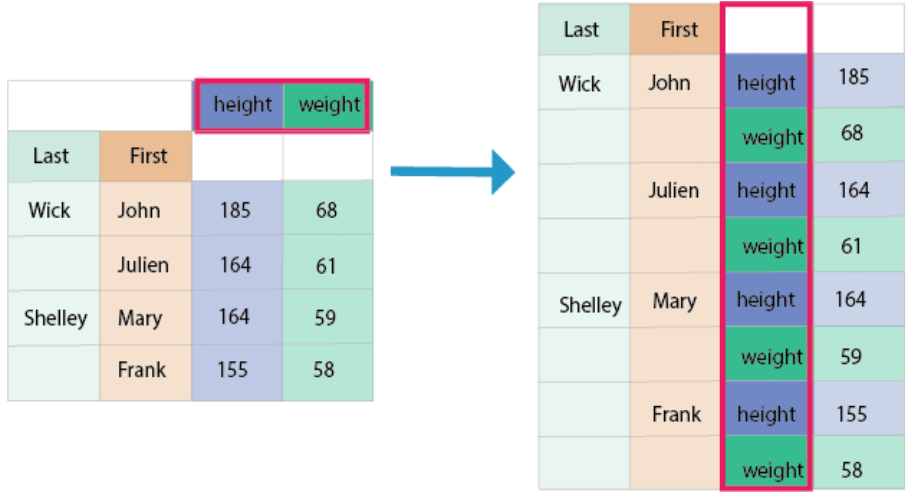

+ pandas.DataFrame.stack() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html

In [4]:
print(churn_1)
ayrac()

#1
churn_1_stacked = churn_1.stack()
print(churn_1_stacked)
ayrac()

                    credit_score  age  country  num_products exited
member credit_card                                                 
yes    no                    619   43   France             1    Yes
no     yes                   608   34  Germany             0     No
yes    yes                   502   23   France             1    Yes

*****

member  credit_card              
yes     no           credit_score        619
                     age                  43
                     country          France
                     num_products          1
                     exited              Yes
no      yes          credit_score        608
                     age                  34
                     country         Germany
                     num_products          0
                     exited               No
yes     yes          credit_score        502
                     age                  23
                     country          France
                     num_products

+ 1-) görüleceği üzere; credit_score, age, country, num_products, exited sütunları artık bir sütun değil, satır dizini haline geldi.


+ **pd.stack(level = "time")** olarak ayarlanmış başka bir multi-indexli veri setinin nasıl görüneceğini görelim: 

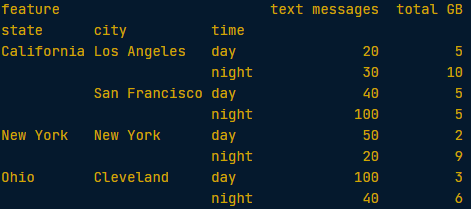

**level** parametresi, girdiğimiz satır indexini sütun haline dönüştürür.

### < Unstacking DataFrames > 

**pd.stack()** ile oluşturduğumuzun tam tersini yapacağız. Bunu **pd.unstack()** işlevi ile gerçekleştireceğiz. Bu; en içteki satır dizinini, en içteki sütun dizini olacak şekilde yeniden düzenlemek anlamına gelir. 

+ pandas.DataFrame.unstack() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

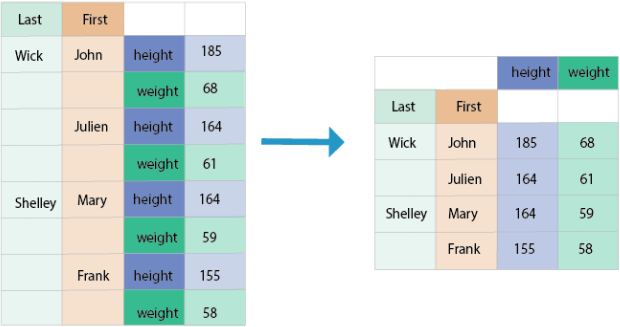

Aşağıdaki kod bloğunda, churn_1_stacked veri setini **pd.unstack()** işlevi ile yeniden düzenleyelim. 

In [5]:
print(churn_1_stacked)
ayrac()

#1
churn_1_unstacked = churn_1_stacked.unstack()
print(churn_1_unstacked)
ayrac()

#2
print(churn_1_unstacked.sort_index(ascending = False))
ayrac()

#3
print(churn_1_stacked.unstack(level = 0))

member  credit_card              
yes     no           credit_score        619
                     age                  43
                     country          France
                     num_products          1
                     exited              Yes
no      yes          credit_score        608
                     age                  34
                     country         Germany
                     num_products          0
                     exited               No
yes     yes          credit_score        502
                     age                  23
                     country          France
                     num_products          1
                     exited              Yes
dtype: object

*****

                   credit_score age  country num_products exited
member credit_card                                              
no     yes                  608  34  Germany            0     No
yes    no                   619  43   France            1    Yes
       ye

+ 1-) Görüleceği üzere churn_1_stacked'taki satır olan sütunlar tekrardan sütun haline geldi.

+ 2-) **pd.unstacked()** işlevi ile ortaya çıkan dataframe, azalan sıraya göre sıralanmış şekildedir.

+ 3-) Dataframe'deki NaN değerlerle nasıl ilgileneceğimizi alttaki bölümde inceleyeceğiz.

### < Handling Missing Data > 

**pd.unstack()** işlevini kullanarak elde ettiğimiz dataframe'lerdeki kayıp verilerle nasıl uğraşacağımızı göreceğiz. Kayıp veriler, unstack (istiften çıkarma) işlemi sırasında alt grupların, aynı etiket setine sahip olmaması durumunda gerçekleşir. 

Aşağıdaki kod bloğunda bunun bir örneğine göz atalım.

In [6]:
import pandas as pd 
animals = pd.read_csv("animals.csv")
print(animals)
ayrac()

#1
animals_new = animals.set_index(["class", "order", "name"])
print(animals_new)
ayrac()

#2
animals_unstacked_1 = animals_new.unstack(level = "class")
print(animals_unstacked_1)
ayrac()

#3 
animals_unstacked_2 = animals_new.unstack(level = "class", fill_value = "No").sort_index(level = ["order", "name"],
                                                                                        ascending = [True, False])
print(animals_unstacked_2)

      class          order      name jump  run  fly
0  Mammalia      Carnivora       Dog   No  Yes   No
1  Mammalia  Diprotodontia  Kangaroo  Yes   No   No
2      Aves      Hervibora      Bird   No   No  Yes

*****

                                jump  run  fly
class    order         name                   
Mammalia Carnivora     Dog        No  Yes   No
         Diprotodontia Kangaroo  Yes   No   No
Aves     Hervibora     Bird       No   No  Yes

*****

                       jump           run           fly         
class                  Aves Mammalia Aves Mammalia Aves Mammalia
order         name                                              
Carnivora     Dog       NaN       No  NaN      Yes  NaN       No
Diprotodontia Kangaroo  NaN      Yes  NaN       No  NaN       No
Hervibora     Bird       No      NaN   No      NaN  Yes      NaN

*****

                       jump           run           fly         
class                  Aves Mammalia Aves Mammalia Aves Mammalia
order        

+ 1-) **class, order, name** sütunlarını satır indexi olacak şekilde ayarladık ve bunu **animals_new** adlı değişkene atadık. Çıktıya dikkat edecek olursak; **Mammalia** sınıfının **Carnivora** gibi bir öğesi var ancak **Aves** sınıfının böyle bir öğesi yok. 


+ 2-) **Mammalia** sınıfının **Carnivora** gibi bir öğesi var ancak **Aves** sınıfının böyle bir öğesi olmadığı için, **level = "class"** olarak ayarladığımızda, **Avel** ve **Mammalia** sütun haline gelir ve birbirlerinde olmayan öğelerden ötürü NaN değerlere sahip olurlar. 


+ 3-) **pd.unstack()** işlevinin **fill_value** parametresi, bu NaN değerleri herhangi bir değerle doldurmamıza izin verir. **animals_unstacked_2** değişkeninde NaN değerleri, No ile değiştirdik ve ek olarak, **order** sütununu artan, **name** sütununu azalan sırada sıraladık.

**pd.stack()** işlevi sonucunda elde edilen NaN değerlerinin durumu biraz farklıdır. Bu işlev sonucunda elde edilen NaN değerler, orijinal veri setindeki dizin ve sütun kombinasyonu eksik olduğunda görülür. 

Aşağıdaki kod bloğunda bunu inceleyelim.

In [7]:
import pandas as pd 
flowers = pd.read_csv("flowers.csv")
print(flowers)

  Unnamed: 0  petals Stigma
0        NaN  number   size
1       rose      40    NaN
2       Lily       8      5


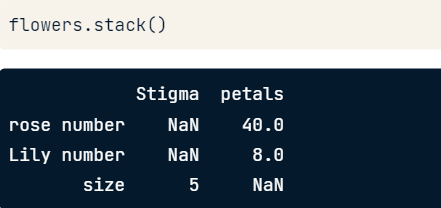

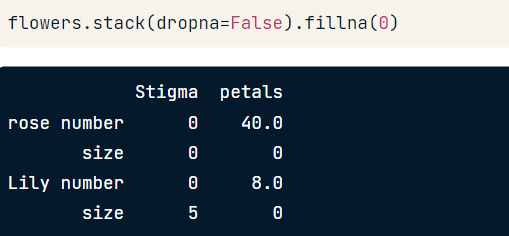

+ **pd.stack()** sonucunda elde edilen NaN değerler de bu şekilde doldurulabilir. Tablodaki değerler, sayısal değerler olunca NaN değerler yerine 0 atamak daha önemli bir hale geliyor. Hem verilerin çoğunu kaybetmiyoruz hem de NaN değerler sonuca etki etmiyor.  